In [3]:
# Importation des principales librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from copy import copy
from scipy import stats
from scipy.stats import skew, kurtosis

## I. Les 5 facteurs de Fama-French

#### 1. Importation des données 
#### 2. Vérification de l'existence de variables manquantes
#### 3. Formatage des dates + Taux sans risque

In [4]:
#importation des données

# Importez les observations mensuelles des facteurs Fama-French à partir de "1963-07-01"
factors_data = pd.read_csv("C:\\Users\\shaoj\\OneDrive\\桌面\\projet_python\\donnees\\F-F_Research_Data_5_Factors_2x3.csv", skiprows=3, index_col=0, skipfooter=1, engine='python')
factors_data_annual=pd.read_csv("C:\\Users\\shaoj\\OneDrive\\桌面\\projet_python\\donnees\\F-F_Research_Data_5_Factors_2x3.csv", skiprows=729, index_col=0,nrows=59,encoding='latin-1')

# Transformez la date en format datetime et utilisez-la comme indice
factors_data.index = pd.to_datetime(factors_data.index, errors='coerce', format='%Y%m')
factors_data = factors_data[factors_data.index >= '1963-07-01']

# Vérifiez l'existence de variables manquantes
missing_values = factors_data.isnull().sum()
missing_values_annual = factors_data_annual.isnull().sum()

# Construisez un dataframe spécifique pour le taux sans risque (RF)
rf_data = factors_data[['RF']]
rf_data_annual=factors_data_annual[['RF']]

# Affichez les 5 premières lignes du dataframe
print(factors_data.tail())
print("\nMissing Values:\n", missing_values)
print("\nRisk-Free Rate DataFrame:\n", rf_data.tail())

print("\n",factors_data_annual.tail())
print("\nMissing Values:\n", missing_values_annual)
print("\nRisk-Free Rate DataFrame:\n", rf_data_annual.tail())

           Mkt-RF    SMB    HML    RMW    CMA    RF
Date                                               
2023-05-01   0.35  -0.38  -7.72  -1.81  -7.22  0.36
2023-06-01   6.46   1.34  -0.26   2.18  -1.62   0.4
2023-07-01   3.21   2.86   4.11  -0.57   0.57  0.45
2023-08-01  -2.39  -3.65  -1.06   3.43  -2.37  0.45
2023-09-01  -5.24  -1.79   1.52   1.87  -0.82  0.43

Missing Values:
 Mkt-RF    0
SMB       0
HML       0
RMW       0
CMA       0
RF        0
dtype: int64

Risk-Free Rate DataFrame:
               RF
Date            
2023-05-01  0.36
2023-06-01   0.4
2023-07-01  0.45
2023-08-01  0.45
2023-09-01  0.43

       Mkt-RF   SMB    HML    RMW    CMA    RF
2018   -6.95 -5.09  -9.67  -1.38   0.06  1.83
2019   28.28 -6.16 -10.46   4.32  -3.06  2.15
2020   23.66  3.42 -46.67  -5.22 -11.50  0.45
2021   23.56 -1.21  25.49  26.69  11.98  0.04
2022  -21.60 -1.61  25.81   6.67  22.43  1.43

Missing Values:
 Mkt-RF    0
SMB       0
HML       0
RMW       0
CMA       0
RF        0
dtype: int64

Risk

#### 4. Représentation graphique des facteurs

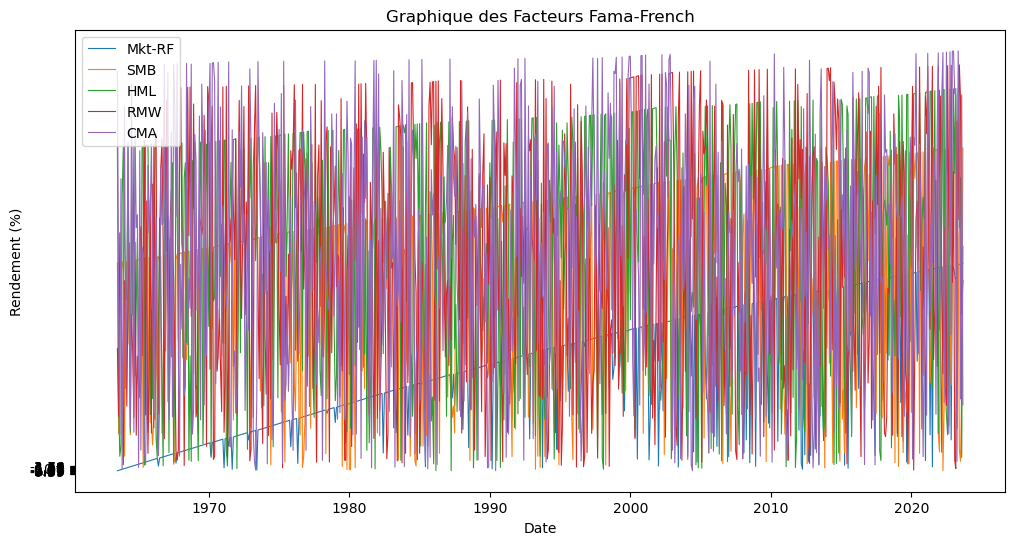

In [5]:
# Représentation graphique des facteurs
plt.figure(figsize=(12, 6))

# Tracé des facteurs
for column in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']:
    plt.plot(factors_data.index, factors_data[column], label=column,linewidth=0.8)

plt.title('Graphique des Facteurs Fama-French')
plt.xlabel('Date')
plt.ylabel('Rendement (%)')

plt.yticks(range(-10, 15, 1))
plt.legend()
plt.show()

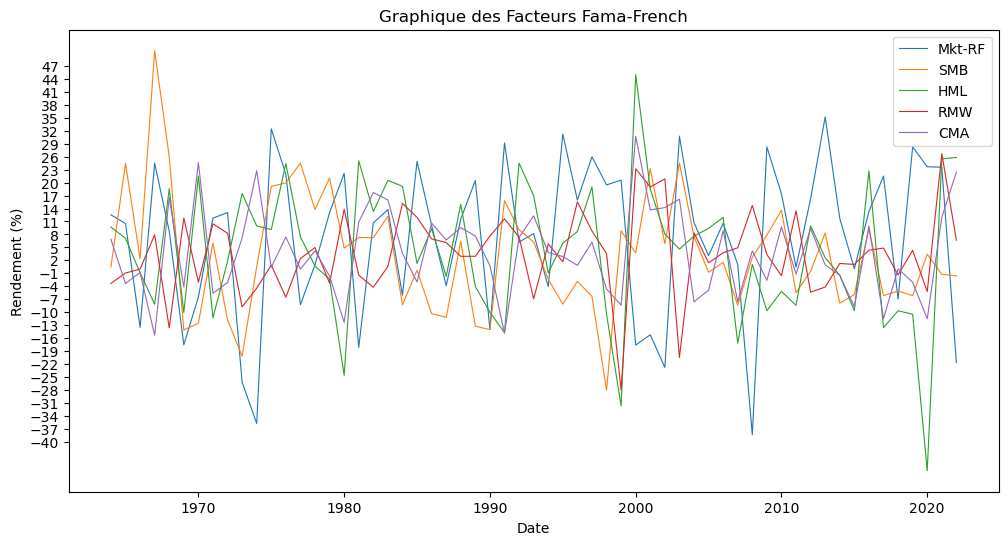

In [6]:
# Représentation graphique des facteurs
plt.figure(figsize=(12, 6))

# Tracé des facteurs
for column in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']:
    plt.plot(factors_data_annual.index, factors_data_annual[column], label=column,linewidth=0.8)

plt.title('Graphique des Facteurs Fama-French')
plt.xlabel('Date')
plt.ylabel('Rendement (%)')

plt.yticks(range(-40, 50, 3))
plt.legend()
plt.show()

#### 5. Statistiques descriptives

In [7]:
# Assurez-vous que les colonnes nécessaires sont numériques
numeric_columns = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']
factors_data[numeric_columns] = factors_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
factors_data_annual[numeric_columns] = factors_data_annual[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Supprimez les lignes avec des valeurs manquantes
factors_data = factors_data.dropna(subset=numeric_columns)
factors_data_annual = factors_data_annual.dropna(subset=numeric_columns)

# Calcul des statistiques pour l'ensemble de l'échantillon
total_statistics = factors_data[numeric_columns].describe()

# Calcul des statistiques par année
yearly_statistics = factors_data_annual[numeric_columns].describe()

# Calcul du skewness et kurtosis pour l'ensemble de l'échantillon
skewness_total = factors_data[numeric_columns].apply(skew)
kurtosis_total = factors_data[numeric_columns].apply(kurtosis)

# Calcul du skewness et kurtosis par année
skewness_yearly = factors_data_annual[numeric_columns].apply(skew)
kurtosis_yearly = factors_data_annual[numeric_columns].apply(kurtosis)


In [8]:
# Afficher les statistiques descriptives pour l'ensemble de l'échantillon par mois
print("Statistiques descriptives pour l'ensemble de l'échantillon par mois:")
print(total_statistics)

# Afficher les statistiques descriptives par année
print("\nStatistiques descriptives par année:")
print(yearly_statistics)

# Afficher le skewness et kurtosis pour l'ensemble de l'échantillon
print("\nSkewness pour l'ensemble de l'échantillon par mois:")
print(skewness_total)
print("\nKurtosis pour l'ensemble de l'échantillon par mois:")
print(kurtosis_total)

# Afficher le skewness et kurtosis par année
print("\nSkewness par année:")
print(skewness_yearly)
print("\nKurtosis par année:")
print(kurtosis_yearly)


Statistiques descriptives pour l'ensemble de l'échantillon par mois:
           Mkt-RF         SMB         HML         RMW         CMA          RF
count  723.000000  723.000000  723.000000  723.000000  723.000000  723.000000
mean     0.555892    0.211189    0.283568    0.290650    0.274329    0.362379
std      4.491112    3.023388    2.995500    2.219599    2.080042    0.265997
min    -23.240000  -15.320000  -13.870000  -18.650000   -7.220000    0.000000
25%     -1.995000   -1.540000   -1.395000   -0.805000   -1.000000    0.140000
50%      0.910000    0.090000    0.220000    0.250000    0.090000    0.380000
75%      3.415000    2.015000    1.740000    1.310000    1.505000    0.500000
max     16.100000   18.280000   12.750000   13.070000    9.070000    1.350000

Statistiques descriptives par année:
          Mkt-RF        SMB        HML        RMW        CMA         RF
count  59.000000  59.000000  59.000000  59.000000  59.000000  59.000000
mean    7.111864   3.145932   4.011186   3.5411

#### 6. Matrice de correlation

Matrice de corrélation des facteurs :
          Mkt-RF       SMB       HML       RMW       CMA        RF
Mkt-RF  1.000000  0.280470 -0.209185 -0.180923 -0.361115 -0.084629
SMB     0.280470  1.000000 -0.014685 -0.352044 -0.093437 -0.035583
HML    -0.209185 -0.014685  1.000000  0.088654  0.686378  0.066941
RMW    -0.180923 -0.352044  0.088654  1.000000 -0.012526 -0.009499
CMA    -0.361115 -0.093437  0.686378 -0.012526  1.000000  0.053965
RF     -0.084629 -0.035583  0.066941 -0.009499  0.053965  1.000000


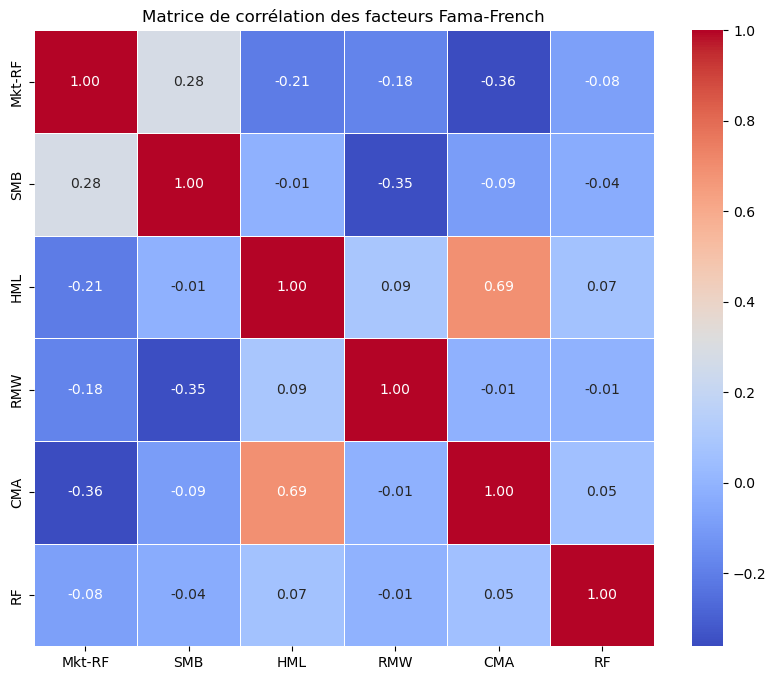

In [9]:
# Estimation de la matrice de corrélation des facteurs
correlation_matrix = factors_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']].corr()

# Affichage de la matrice de corrélation
print("Matrice de corrélation des facteurs :")
print(correlation_matrix)

# Représentation graphique de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de corrélation des facteurs Fama-French')
plt.show()


Matrice de corrélation des facteurs :
          Mkt-RF       SMB       HML       RMW       CMA        RF
Mkt-RF  1.000000  0.215835 -0.274866 -0.207765 -0.389728 -0.184780
SMB     0.215835  1.000000  0.101407 -0.171307 -0.016978 -0.019852
HML    -0.274866  0.101407  1.000000  0.175881  0.772699  0.163497
RMW    -0.207765 -0.171307  0.175881  1.000000 -0.030606 -0.006159
CMA    -0.389728 -0.016978  0.772699 -0.030606  1.000000  0.140240
RF     -0.184780 -0.019852  0.163497 -0.006159  0.140240  1.000000


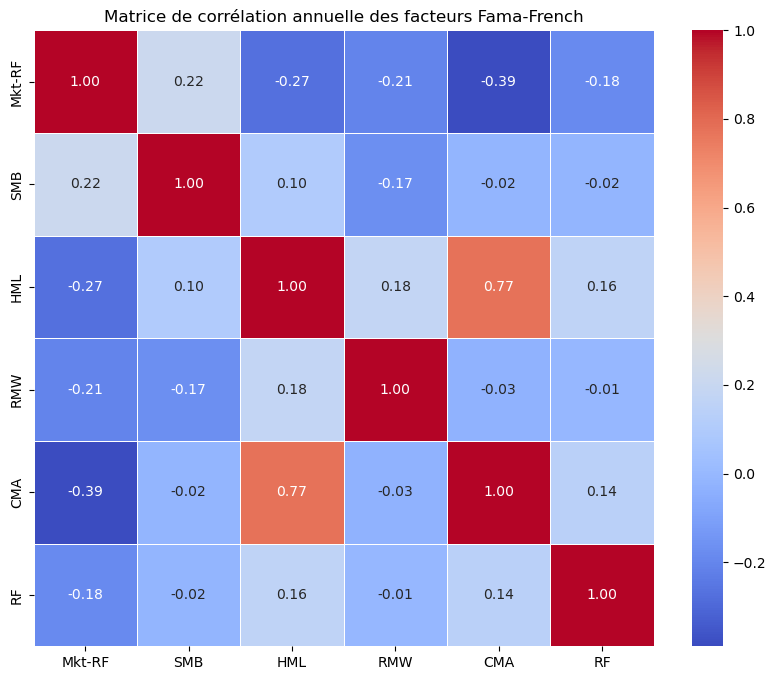

In [10]:
# Estimation de la matrice de corrélation des facteurs
correlation_matrix = factors_data_annual[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']].corr()

# Affichage de la matrice de corrélation
print("Matrice de corrélation des facteurs :")
print(correlation_matrix)

# Représentation graphique de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de corrélation annuelle des facteurs Fama-French')
plt.show()


In [11]:
from scipy.stats import pearsonr

# Calcul de la corrélation entre HML et SMB
correlation_hml_smb, p_value = pearsonr(factors_data['HML'], factors_data['SMB'])

# Affichage de la corrélation et de la p-value
print(f"\nCorrélation entre HML et SMB : {correlation_hml_smb}")
print(f"P-value associée : {p_value}")



Corrélation entre HML et SMB : -0.014685362771230642
P-value associée : 0.693427673826619


### Commentaire
Cette matrice de corrélation fournit des informations sur la corrélation entre différents facteurs, ce qui aide les investisseurs à mieux comprendre l'impact de ces facteurs dans leurs décisions d'investissement. Voici quelques observations et commentaires clés :

##### Facteur de prime de risque du marché (Mkt-RF) par rapport aux autres facteurs :

Il existe une corrélation positive avec le facteur de prime des actions de petite capitalisation (SMB), ce qui signifie que les actions de petite capitalisation peuvent mieux performer lorsque le marché est en hausse.
Il existe une corrélation négative avec le facteur de prime des actions à faible valorisation (HML), ce qui suggère que les actions à faible valorisation peuvent sous-performer lorsque le marché est en hausse.
##### Facteur de prime des actions de petite capitalisation (SMB) par rapport aux autres facteurs :

Il existe une corrélation positive avec le facteur de prime de risque du marché (Mkt-RF), ce qui suggère que les actions de petite capitalisation peuvent mieux performer lorsque le marché est en hausse.
Il existe une corrélation négative avec le facteur de rentabilité des entreprises (CMA), ce qui suggère que les actions de petite capitalisation peuvent sous-performer lorsque la rentabilité des entreprises est élevée.
##### Facteur de prime des actions à faible valorisation (HML) par rapport aux autres facteurs :

Il existe une corrélation positive avec le facteur de rentabilité des entreprises (CMA), ce qui suggère que les actions à faible valorisation peuvent mieux performer lorsque la rentabilité des entreprises est élevée.
##### Facteur de rentabilité des entreprises (CMA) par rapport aux autres facteurs :

Il existe une corrélation positive avec le facteur de prime des actions à faible valorisation (HML), ce qui suggère que les actions à faible valorisation peuvent mieux performer lorsque la rentabilité des entreprises est élevée.
Il existe une corrélation négative avec le facteur de prime de risque du marché (Mkt-RF), ce qui suggère que la rentabilité des entreprises peut être plus élevée lorsque le marché est en hausse.
##### Facteur de rotation du capital actif (RMW) par rapport aux autres facteurs :

Il existe une corrélation relativement faible avec le facteur de taux sans risque (RF), ce qui indique une relation moins prononcée entre ces deux facteurs.
Facteur de taux sans risque (RF) par rapport aux autres facteurs :

Il existe une corrélation relativement faible avec les autres facteurs, ce qui suggère que son impact sur les portefeuilles d'investissement est moins important.

## II. Les 25 portefeuilles formés à partir de size et B/M

#### 1. Importation des données

In [12]:
# Spécifiez l'encodage et le séparateur lors de la lecture du fichier
file_path = "C:\\Users\\shaoj\\OneDrive\\桌面\\projet_python\\donnees\\25_Portfolios_BEME_OP_5x5_Wout_Div.CSV"
portfolios_data = pd.read_csv(file_path, skiprows=21, index_col=0,nrows=723,encoding='latin-1')
portfolios_data.head()

,LoBM LoOP,BM1 OP2,BM1 OP3,BM1 OP4,LoBM HiOP,BM2 OP1,BM2 OP2,BM2 OP3,BM2 OP4,BM2 OP5,...,BM4 OP1,BM4 OP2,BM4 OP3,BM4 OP4,BM4 OP5,HiBM LoOP,BM5 OP2,BM5 OP3,BM5 OP4,HiBM HiOP
Date,,,,,,,,,,,,,,,,,,,,,
196307,1.2623,2.3561,0.0607,-1.3786,0.5664,0.9993,1.1767,0.0873,-0.5648,-1.7854,...,-1.9017,-0.6962,-5.3396,0.8350,2.2712,-2.0831,1.3898,2.7043,-2.6274,-1.4786
196308,5.8711,1.9047,6.0121,5.2857,5.3890,0.9254,3.1166,3.9449,4.8578,5.2287,...,7.1559,5.9545,14.9653,3.8425,11.8604,5.1897,4.7552,2.5373,6.3988,3.3189
196309,-5.0591,-4.6978,1.3522,-2.0855,-1.2833,-2.1914,-3.4784,0.4944,-2.7454,-4.8934,...,-1.6790,-0.5462,3.6673,-1.4547,-8.5726,-2.9201,-4.8250,-1.0572,-0.4710,-3.3070
196310,-2.4794,-3.7541,0.7433,3.8618,7.2150,-0.5754,1.8540,2.4607,-0.9950,2.5919,...,2.6678,0.1624,9.8256,6.1852,18.6751,1.1568,1.2259,2.0655,-3.0212,8.2982
196311,-3.1730,-0.8676,-1.5319,0.5807,-3.6904,-5.8194,-0.4104,1.5279,-1.1904,-2.3474,...,-0.2609,-2.3525,-5.0123,0.6559,5.1434,0.5268,-2.5245,-1.6689,-0.4706,-3.1219


In [13]:
# Transformation des dates au format yyyy-mm-01
portfolios_data.index = pd.to_datetime(portfolios_data.index, errors='coerce', format='%Y%m')

#Sélectionner à partir de date 1963-07-01
portfolios_data = portfolios_data[portfolios_data.index >= '1963-07-01']

# Affichage des premières lignes du DataFrame
print(portfolios_data.head())

            LoBM LoOP  BM1 OP2  BM1 OP3  BM1 OP4  LoBM HiOP  BM2 OP1  BM2 OP2  \
Date                                                                            
1963-07-01     1.2623   2.3561   0.0607  -1.3786     0.5664   0.9993   1.1767   
1963-08-01     5.8711   1.9047   6.0121   5.2857     5.3890   0.9254   3.1166   
1963-09-01    -5.0591  -4.6978   1.3522  -2.0855    -1.2833  -2.1914  -3.4784   
1963-10-01    -2.4794  -3.7541   0.7433   3.8618     7.2150  -0.5754   1.8540   
1963-11-01    -3.1730  -0.8676  -1.5319   0.5807    -3.6904  -5.8194  -0.4104   

            BM2 OP3  BM2 OP4  BM2 OP5  ...  BM4 OP1  BM4 OP2  BM4 OP3  \
Date                                   ...                              
1963-07-01   0.0873  -0.5648  -1.7854  ...  -1.9017  -0.6962  -5.3396   
1963-08-01   3.9449   4.8578   5.2287  ...   7.1559   5.9545  14.9653   
1963-09-01   0.4944  -2.7454  -4.8934  ...  -1.6790  -0.5462   3.6673   
1963-10-01   2.4607  -0.9950   2.5919  ...   2.6678   0.1624   9.82

#### 2. Calculez les excès de rendements $R_{it} -RF_{t}$

In [14]:
#Merger les datas et RF
merged_data = pd.merge(portfolios_data, rf_data, on='Date', how='left')
rf_data['RF'] = pd.to_numeric(rf_data['RF'], errors='coerce')
merged_data

,LoBM LoOP,BM1 OP2,BM1 OP3,BM1 OP4,LoBM HiOP,BM2 OP1,BM2 OP2,BM2 OP3,BM2 OP4,BM2 OP5,...,BM4 OP2,BM4 OP3,BM4 OP4,BM4 OP5,HiBM LoOP,BM5 OP2,BM5 OP3,BM5 OP4,HiBM HiOP,RF
Date,,,,,,,,,,,,,,,,,,,,,
1963-07-01,1.2623,2.3561,0.0607,-1.3786,0.5664,0.9993,1.1767,0.0873,-0.5648,-1.7854,...,-0.6962,-5.3396,0.8350,2.2712,-2.0831,1.3898,2.7043,-2.6274,-1.4786,0.27
1963-08-01,5.8711,1.9047,6.0121,5.2857,5.3890,0.9254,3.1166,3.9449,4.8578,5.2287,...,5.9545,14.9653,3.8425,11.8604,5.1897,4.7552,2.5373,6.3988,3.3189,0.25
1963-09-01,-5.0591,-4.6978,1.3522,-2.0855,-1.2833,-2.1914,-3.4784,0.4944,-2.7454,-4.8934,...,-0.5462,3.6673,-1.4547,-8.5726,-2.9201,-4.8250,-1.0572,-0.4710,-3.3070,0.27
1963-10-01,-2.4794,-3.7541,0.7433,3.8618,7.2150,-0.5754,1.8540,2.4607,-0.9950,2.5919,...,0.1624,9.8256,6.1852,18.6751,1.1568,1.2259,2.0655,-3.0212,8.2982,0.29
1963-11-01,-3.1730,-0.8676,-1.5319,0.5807,-3.6904,-5.8194,-0.4104,1.5279,-1.1904,-2.3474,...,-2.3525,-5.0123,0.6559,5.1434,0.5268,-2.5245,-1.6689,-0.4706,-3.1219,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,10.0977,6.2492,-1.0759,12.7733,1.4655,9.0146,-2.0100,-1.8815,-3.5716,-0.4939,...,-6.5003,-8.4818,-3.8537,-6.6704,-7.8915,-6.6034,-4.0411,-4.5982,-10.3103,0.36
2023-06-01,5.3849,7.4446,5.3773,8.7382,6.5803,3.2510,6.5592,6.4198,5.2037,8.5788,...,5.9250,5.4416,7.3581,14.3667,10.3101,5.3176,5.9439,3.9588,14.7055,0.4
2023-07-01,4.9171,0.8839,2.3438,3.5863,1.4706,6.9145,1.8782,4.1941,7.1681,7.4255,...,4.1496,8.6121,5.3051,8.2419,7.5916,7.6837,7.3940,7.2865,9.3661,0.45


In [15]:
# fonction de calculer les rendements exédentaire
def calculate_rit_rf(df, rf):
    df_excess_return = df.copy()

    # loop pour tous les titres
    for stock in df.columns[1:]:
        # loop pour chaque ligne du titre
        for j in range(min(len(df), len(rf))):
            # calculer les rendements exédentaires
            df_excess_return[stock][j] = float(df[stock][j]) - float(rf['RF'][j])

    return df_excess_return


In [16]:
df=calculate_rit_rf(merged_data,rf_data)
exces_return=df.drop(df.columns[-1], axis=1)
exces_return

,LoBM LoOP,BM1 OP2,BM1 OP3,BM1 OP4,LoBM HiOP,BM2 OP1,BM2 OP2,BM2 OP3,BM2 OP4,BM2 OP5,...,BM4 OP1,BM4 OP2,BM4 OP3,BM4 OP4,BM4 OP5,HiBM LoOP,BM5 OP2,BM5 OP3,BM5 OP4,HiBM HiOP
Date,,,,,,,,,,,,,,,,,,,,,
1963-07-01,1.2623,2.0861,-0.2093,-1.6486,0.2964,0.7293,0.9067,-0.1827,-0.8348,-2.0554,...,-2.1717,-0.9662,-5.6096,0.5650,2.0012,-2.3531,1.1198,2.4343,-2.8974,-1.7486
1963-08-01,5.8711,1.6547,5.7621,5.0357,5.1390,0.6754,2.8666,3.6949,4.6078,4.9787,...,6.9059,5.7045,14.7153,3.5925,11.6104,4.9397,4.5052,2.2873,6.1488,3.0689
1963-09-01,-5.0591,-4.9678,1.0822,-2.3555,-1.5533,-2.4614,-3.7484,0.2244,-3.0154,-5.1634,...,-1.9490,-0.8162,3.3973,-1.7247,-8.8426,-3.1901,-5.0950,-1.3272,-0.7410,-3.5770
1963-10-01,-2.4794,-4.0441,0.4533,3.5718,6.9250,-0.8654,1.5640,2.1707,-1.2850,2.3019,...,2.3778,-0.1276,9.5356,5.8952,18.3851,0.8668,0.9359,1.7755,-3.3112,8.0082
1963-11-01,-3.1730,-1.1376,-1.8019,0.3107,-3.9604,-6.0894,-0.6804,1.2579,-1.4604,-2.6174,...,-0.5309,-2.6225,-5.2823,0.3859,4.8734,0.2568,-2.7945,-1.9389,-0.7406,-3.3919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,10.0977,5.8892,-1.4359,12.4133,1.1055,8.6546,-2.3700,-2.2415,-3.9316,-0.8539,...,-4.9617,-6.8603,-8.8418,-4.2137,-7.0304,-8.2515,-6.9634,-4.4011,-4.9582,-10.6703
2023-06-01,5.3849,7.0446,4.9773,8.3382,6.1803,2.8510,6.1592,6.0198,4.8037,8.1788,...,5.5053,5.5250,5.0416,6.9581,13.9667,9.9101,4.9176,5.5439,3.5588,14.3055
2023-07-01,4.9171,0.4339,1.8938,3.1363,1.0206,6.4645,1.4282,3.7441,6.7181,6.9755,...,5.3877,3.6996,8.1621,4.8551,7.7919,7.1416,7.2337,6.9440,6.8365,8.9161


In [17]:
# Spécifiez l'encodage et le séparateur lors de la lecture du fichier
file_path = "C:\\Users\\shaoj\\OneDrive\\桌面\\projet_python\\donnees\\25_Portfolios_BEME_OP_5x5_Wout_Div.CSV"
averge_equal_weighted_return = pd.read_csv(file_path, skiprows=748, index_col=0,nrows=723,encoding='latin-1')
averge_equal_weighted_return.tail()


,LoBM LoOP,BM1 OP2,BM1 OP3,BM1 OP4,LoBM HiOP,BM2 OP1,BM2 OP2,BM2 OP3,BM2 OP4,BM2 OP5,...,BM4 OP1,BM4 OP2,BM4 OP3,BM4 OP4,BM4 OP5,HiBM LoOP,BM5 OP2,BM5 OP3,BM5 OP4,HiBM HiOP
202305,6.7779,6.4824,4.3988,-0.4807,-3.1682,3.4601,-0.9958,-1.5729,-2.7058,-1.9671,...,-0.1784,-0.3895,-3.9083,-4.7092,-3.4317,1.9820,-3.6286,-5.9401,-6.1516,-9.4768
202306,3.2983,6.2710,8.0561,9.9518,8.2574,0.5535,8.2828,8.3561,7.8169,11.1885,...,5.0078,5.6690,8.0074,10.3649,14.1563,5.5824,7.9680,6.2981,7.2230,9.1125
202307,2.0718,2.7942,2.9013,0.8520,4.0519,1.8237,3.4700,3.0560,3.8446,6.2293,...,6.9903,5.6397,9.4308,9.0336,8.8236,4.3476,9.1249,11.6848,12.1298,13.4925
202308,-8.0524,-5.5549,-0.9531,-4.1717,-2.6883,-10.2769,-4.6300,-2.1978,-4.3613,-4.5336,...,-8.1010,-4.0705,-6.0895,-3.8642,-1.0068,-8.8735,-2.8478,-4.9245,-7.1902,-4.0809
202309,-9.4531,-8.0853,-5.7348,-5.7288,-5.7737,-9.5773,-5.5309,-5.8592,-5.7749,-2.5876,...,-8.1366,-4.9616,-4.8887,-4.2376,1.7261,-8.1159,-4.7333,-5.3309,-5.9691,-7.1224


In [18]:
# Spécifiez l'encodage et le séparateur lors de la lecture du fichier
file_path = "C:\\Users\\shaoj\\OneDrive\\桌面\\projet_python\\donnees\\25_Portfolios_BEME_OP_5x5_Wout_Div.CSV"
average_cap = pd.read_csv(file_path, skiprows=2328, index_col=0,nrows=723,encoding='latin-1')
average_cap.head()

,LoBM LoOP,BM1 OP2,BM1 OP3,BM1 OP4,LoBM HiOP,BM2 OP1,BM2 OP2,BM2 OP3,BM2 OP4,BM2 OP5,...,BM4 OP1,BM4 OP2,BM4 OP3,BM4 OP4,BM4 OP5,HiBM LoOP,BM5 OP2,BM5 OP3,BM5 OP4,HiBM HiOP
196307,44.73,957.50,559.47,603.33,580.80,264.22,751.88,867.41,234.40,83.10,...,56.55,218.12,106.78,104.87,42.72,50.57,102.26,24.99,1230.25,15.10
196308,45.30,980.06,559.81,595.02,584.09,266.86,760.73,868.17,233.08,81.62,...,55.48,216.60,101.08,105.75,43.69,49.52,103.68,25.67,1197.93,14.88
196309,47.95,998.72,593.47,626.47,615.57,269.33,784.44,902.42,244.40,85.89,...,59.45,229.50,116.21,109.81,48.88,52.09,108.61,26.32,1274.58,15.37
196310,45.53,951.80,601.49,613.40,607.67,263.42,757.15,906.88,237.69,81.69,...,58.45,228.24,120.47,108.21,44.69,50.57,103.37,26.04,1268.58,14.86
196311,44.40,916.07,605.96,637.09,651.51,261.91,771.19,929.20,235.33,83.80,...,60.01,228.61,132.31,114.91,53.03,51.16,104.64,26.58,1230.25,16.10


In [19]:
# Spécifiez l'encodage et le séparateur lors de la lecture du fichier
file_path = "C:\\Users\\shaoj\\OneDrive\\桌面\\projet_python\\donnees\\25_Portfolios_BEME_OP_5x5_Wout_Div.CSV"
bm_data = pd.read_csv(file_path, skiprows=3059, index_col=0,nrows=723,encoding='latin-1')
bm_data.head()

,LoBM LoOP,BM1 OP2,BM1 OP3,BM1 OP4,LoBM HiOP,BM2 OP1,BM2 OP2,BM2 OP3,BM2 OP4,BM2 OP5,...,BM4 OP1,BM4 OP2,BM4 OP3,BM4 OP4,BM4 OP5,HiBM LoOP,BM5 OP2,BM5 OP3,BM5 OP4,HiBM HiOP
196307,0.3758,0.4124,0.3394,0.3003,0.2745,0.5727,0.6003,0.5531,0.5316,0.5359,...,1.1731,1.1581,1.1767,1.1591,1.2373,2.0179,1.5268,1.6140,1.6082,1.6437
196308,0.3755,0.4123,0.3401,0.3009,0.2746,0.5717,0.6008,0.5529,0.5316,0.5361,...,1.1719,1.1563,1.1779,1.1606,1.2382,2.0111,1.5260,1.6359,1.6082,1.6490
196309,0.3750,0.4124,0.3398,0.3011,0.2747,0.5715,0.6006,0.5530,0.5317,0.5354,...,1.1681,1.1568,1.1809,1.1600,1.2414,2.0091,1.5258,1.6638,1.6082,1.6427
196310,0.3744,0.4124,0.3386,0.3008,0.2742,0.5710,0.6006,0.5531,0.5320,0.5353,...,1.1682,1.1570,1.1807,1.1582,1.2374,2.0217,1.5268,1.6650,1.6082,1.6469
196311,0.3761,0.4125,0.3392,0.3016,0.2753,0.5715,0.6009,0.5532,0.5319,0.5347,...,1.1675,1.1593,1.1809,1.1597,1.2405,2.0249,1.5280,1.6660,1.6082,1.6431


#### 3. Calcul de statistiques descriptives

Rendements moyens pour chaque portefeuille :
 LoBM LoOP    0.469513
BM1 OP2      0.852098
BM1 OP3      0.760129
BM1 OP4      0.763138
LoBM HiOP    0.812357
BM2 OP1      0.557487
BM2 OP2      0.651496
BM2 OP3      0.755413
BM2 OP4      0.748772
BM2 OP5      0.759914
BM3 OP1      0.460039
BM3 OP2      0.643856
BM3 OP3      0.685977
BM3 OP4      0.873029
BM3 OP5      0.959864
BM4 OP1      0.601236
BM4 OP2      0.637288
BM4 OP3      0.807756
BM4 OP4      0.791738
BM4 OP5      1.075942
HiBM LoOP    0.841275
BM5 OP2      0.847829
BM5 OP3      0.972503
BM5 OP4      1.062042
HiBM HiOP    1.029362
dtype: float64


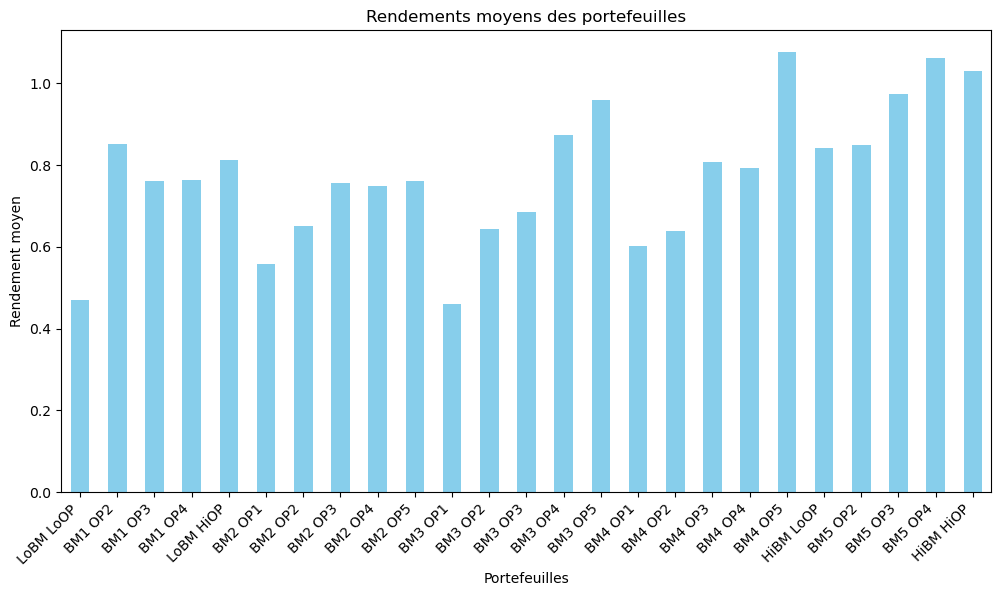

In [20]:
# Calcul des rendements moyens pour chaque portefeuille
mean_returns = portfolios_data.mean()

# Affichage des rendements moyens
print("Rendements moyens pour chaque portefeuille :\n", mean_returns)

# Visualisation de la relation entre le rendement moyen, la taille et le B/M
plt.figure(figsize=(12, 6))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Rendements moyens des portefeuilles')
plt.xlabel('Portefeuilles')
plt.ylabel('Rendement moyen')
plt.xticks(rotation=45, ha='right')
plt.show()

Rendements moyens pour chaque portefeuille :
 LoBM LoOP    0.469513
BM1 OP2      0.489720
BM1 OP3      0.397750
BM1 OP4      0.400759
LoBM HiOP    0.449978
BM2 OP1      0.195108
BM2 OP2      0.289117
BM2 OP3      0.393034
BM2 OP4      0.386393
BM2 OP5      0.397535
BM3 OP1      0.097660
BM3 OP2      0.281477
BM3 OP3      0.323598
BM3 OP4      0.510650
BM3 OP5      0.597485
BM4 OP1      0.238857
BM4 OP2      0.274909
BM4 OP3      0.445377
BM4 OP4      0.429359
BM4 OP5      0.713563
HiBM LoOP    0.478896
BM5 OP2      0.485450
BM5 OP3      0.610124
BM5 OP4      0.699663
HiBM HiOP    0.666983
dtype: float64


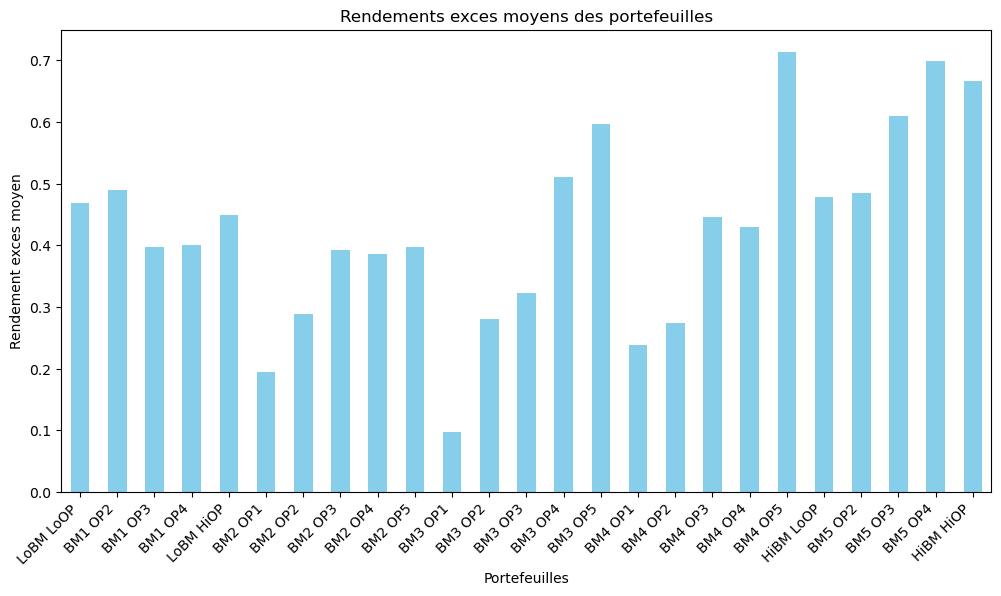

In [21]:
mean_exces_returns = exces_return.mean()
# Affichage des rendements moyens
print("Rendements moyens pour chaque portefeuille :\n", mean_exces_returns)

# Visualisation de la relation entre le rendement moyen, la taille et le B/M
plt.figure(figsize=(12, 6))
mean_exces_returns.plot(kind='bar', color='skyblue')
plt.title('Rendements exces moyens des portefeuilles')
plt.xlabel('Portefeuilles')
plt.ylabel('Rendement exces moyen')
plt.xticks(rotation=45, ha='right')
plt.show()

### Commentaire

Les deux images ci-dessus montrent respectivement le rendement moyen et le rendement moyen excédentaire de 25 portefeuilles d'investissement.
La tendance dans la deuxième image est plus évidente.

On observe que lorsque le ratio BM est le même, plus la valeur OP est élevée, plus le rendement moyen du portefeuille est élevé, 
et inversement, plus il est faible.Lorsque les valeurs OP sont les mêmes, aucune tendance claire n'est observée

## III. Estimation du modèle à facteurs

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### 1. Construisez une fonction permettant d'estimer ces trois régressions.

In [23]:
#Définir les facteurs explicative et le facteur expliqué
X1=factors_data[['Mkt-RF']]
X2=factors_data[['Mkt-RF','SMB', 'HML']]
X3=factors_data[['Mkt-RF','SMB', 'HML','RMW','CMA']]

In [24]:
def FF_model(X1,X2,X3,Y):
    X1= np.array(X1)
    model_capm=sm.OLS(Y,X1).fit()    
    abs_intercept_capm = np.abs(model_capm.params[0])
    print('Dans le modèle de CAPM:')
    print('\n',f'Les coefficients sont: \n{model_capm.params}')
    print('\n',f'Les t-values sont: \n{model_capm.tvalues}')
    print('\n',f'les résidu sont: \n{model_capm.resid}')
    print('\n', f'La moyenne des constantes en valeur absolue est: {abs_intercept_capm}')
    
    X2= np.array(X2)
    model_trois_facteurs=sm.OLS(Y,X2).fit()
    abs_intercept_trois = np.abs(model_trois_facteurs.params[0])
    print('\n','Dans le modèle sur 3 facteurs:')
    print('\n',f'Les coefficients sont:\n {model_trois_facteurs.params}')
    print('\n',f'Les t-values sont:\n {model_trois_facteurs.tvalues}')
    print('\n',f'les résidu sont: \n{model_trois_facteurs.resid}')
    print('\n', f'La moyenne des constantes en valeur absolue est: {abs_intercept_trois}')
    
    X3 = np.array(X3)
    model_ff=sm.OLS(Y,X3).fit()
    abs_intercept_ff = np.abs(model_ff.params[0])
    print('\n','Dans le modèle sur 5 facteurs:')
    print('\n',f'Les coefficients sont: \n{model_ff.params}')
    print('\n',f'Les t-values sont:\n {model_ff.tvalues}')
    print('\n',f'les résidu sont:\n {model_ff.resid}')
    print('\n', f'La moyenne des constantes en valeur absolue est: {abs_intercept_ff}')

In [25]:
Y = exces_return.loc[:, 'LoBM LoOP']
FF_model(X1,X2,X3,Y)

Dans le modèle de CAPM:

 Les coefficients sont: 
x1    1.425795
dtype: float64

 Les t-values sont: 
x1    36.169947
dtype: float64

 les résidu sont: 
Date
1963-07-01    1.818360
1963-08-01   -1.357683
1963-09-01   -2.820601
1963-10-01   -6.086663
1963-11-01   -1.961074
                ...   
2023-05-01    9.598672
2023-06-01   -3.825739
2023-07-01    0.340296
2023-08-01   -2.413349
2023-09-01    2.438568
Length: 723, dtype: float64

 La moyenne des constantes en valeur absolue est: 1.4257954930833336

 Dans le modèle sur 3 facteurs:

 Les coefficients sont:
 x1    1.203775
x2    0.594463
x3   -0.833134
dtype: float64

 Les t-values sont:
 x1    36.175064
x2    12.198103
x3   -17.373082
dtype: float64

 les résidu sont: 
Date
1963-07-01    1.167362
1963-08-01    1.743174
1963-09-01   -2.751746
1963-10-01   -4.781960
1963-11-01   -0.168680
                ...   
2023-05-01    3.470479
2023-06-01   -3.404679
2023-07-01    2.777001
2023-08-01   -1.657312
2023-09-01    3.605631
Length: 7

#### 2. Commentaires des estimations 

In [26]:
titre_nom=['LoBM LoOP','BM1 OP2','BM1 OP3','BM1 OP4','LoBM HiOP','BM2 OP1','BM2 OP2','BM2 OP3',
           'BM2 OP4','BM2 OP5','BM3 OP1','BM3 OP2','BM3 OP3','BM3 OP4','BM3 OP5','BM4 OP1','BM4 OP2',
       'BM4 OP3','BM4 OP4','BM4 OP5','HiBM LoOP','BM5 OP2','BM5 OP3','BM5 OP4','HiBM HiOP']   

In [27]:
# identifier les betas
# initial les liste des résultats
market_sup_1 = []
market_eq_1 = []
market_inf_1 = []
non_significant_HML = []
non_significant_SMB = []
non_significant_CMA = []

for i in range(0,len(titre_nom)):
    portfolio=titre_nom[i]
    Y = exces_return.loc[:, portfolio]
    model=sm.OLS(Y,X3).fit()    
    market_coefficient= np.abs(model.params[0])
    if market_coefficient > 1:
        market_sup_1.append(portfolio)
    elif market_coefficient == 1:
        market_eq_1.append(portfolio)
    else:
        market_inf_1.append(portfolio)
         
    # Pour chacun des facteurs HML, SMB et CMA
    t_HML = model.tvalues[2]  
    t_SMB = model.tvalues[3]
    t_CMA = model.tvalues[4]
        
    if t_HML < 0.05:
        non_significant_HML.append(portfolio)
    if t_SMB < 0.05:
        non_significant_SMB.append(portfolio)
    if t_CMA < 0.05:
        non_significant_CMA.append(portfolio)

print('\n',f'le coefficients du rendement du portefeuille du marché est supérieur à 1: \n{market_sup_1}')
print('\n',f'le coefficients du rendement du portefeuille du marché est égale à 1: \n{market_eq_1}')
print('\n',f'le coefficients du rendement du portefeuille du marché est inférieur à 1:\n{market_inf_1}')
print('\n',f'Dans les {len(non_significant_HML)} portefeuilles d’investissement, le facteur HML n’est pas significatif respectivement : \n{non_significant_HML}')
print('\n',f'Dans les {len(non_significant_SMB)} portefeuilles d’investissement, le facteur SMB n’est pas significatif respectivement : \n{non_significant_SMB}')
print('\n',f'Dans les {len(non_significant_CMA)} portefeuilles d’investissement, le facteur CMA n’est pas significatif respectivement : \n{non_significant_CMA}')



 le coefficients du rendement du portefeuille du marché est supérieur à 1: 
['LoBM LoOP', 'BM1 OP2', 'BM1 OP3', 'BM2 OP1', 'BM2 OP2', 'BM2 OP3', 'BM3 OP1', 'BM3 OP5', 'BM4 OP1', 'BM4 OP4', 'BM4 OP5', 'HiBM LoOP', 'BM5 OP2', 'BM5 OP3', 'BM5 OP4', 'HiBM HiOP']

 le coefficients du rendement du portefeuille du marché est égale à 1: 
[]

 le coefficients du rendement du portefeuille du marché est inférieur à 1:
['BM1 OP4', 'LoBM HiOP', 'BM2 OP4', 'BM2 OP5', 'BM3 OP2', 'BM3 OP3', 'BM3 OP4', 'BM4 OP2', 'BM4 OP3']

 Dans les 8 portefeuilles d’investissement, le facteur HML n’est pas significatif respectivement : 
['LoBM LoOP', 'BM1 OP2', 'BM1 OP3', 'BM1 OP4', 'LoBM HiOP', 'BM2 OP1', 'BM2 OP2', 'BM2 OP3']

 Dans les 10 portefeuilles d’investissement, le facteur SMB n’est pas significatif respectivement : 
['LoBM LoOP', 'BM1 OP2', 'BM1 OP3', 'BM2 OP1', 'BM2 OP2', 'BM3 OP1', 'BM3 OP2', 'BM4 OP1', 'HiBM LoOP', 'BM5 OP2']

 Dans les 16 portefeuilles d’investissement, le facteur CMA n’est pas sign

### Commnetaire

Lorsque nous introduisons l'équation dans le modèle 3：
nous pouvons observer que 16 portefeuilles ont une exposition au risque de marché (bêta du marché) supérieure à 1, ce qui signifie qu'ils peuvent être plus sensibles aux fluctuations du marché. Ces portefeuilles peuvent bien performer sur le marché, mais ils comportent également un risque de marché plus élevé.

De même, 9 portefeuilles ont des bêtas inférieurs à 1, ce qui signifie qu'ils peuvent avoir des performances relativement stables et présenter de faibles risques lorsque le marché fluctue.

#### 3. Corrélation des résidus

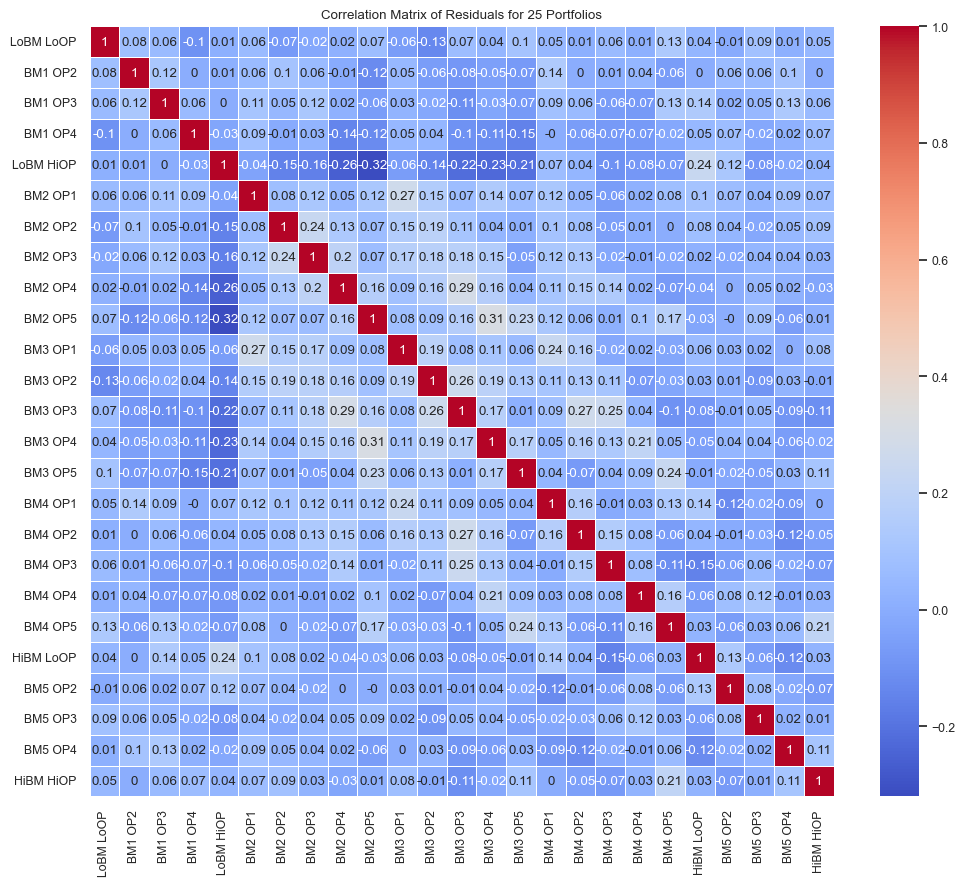

In [28]:
# Créer un DataFrame pour conserver les résidus
residuals_df = pd.DataFrame()

# loop pour chaque portfolio
for portfolio in titre_nom:
    Y = exces_return.loc[:, portfolio]
    model = sm.OLS(Y, X3).fit()
    residuals = model.resid
    residuals_df[portfolio] = residuals

# Calculer la corrélation
correlation_matrix = residuals_df.corr()

# deux décimale
correlation_matrix = correlation_matrix.round(2)

# Créer la visualisation graphique
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.8)  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of Residuals for 25 Portfolios")
plt.show()

#### 4. Affichez et commentez les moyennes des $\vert \alpha_{i} \vert$

In [31]:
alpha_values = []

for i in range(len(titre_nom)):
    portfolio = titre_nom[i]
    Y = exces_return.loc[:, portfolio]
    model_ff = sm.OLS(Y, X3).fit()
    alpha = model_ff.params[0]
    print(f"Titre: {portfolio}, Abs-Alpha: {alpha}")
    alpha_values.append(alpha)

# calculer le alpha moyen
average_alpha = np.mean(alpha_values)

# print value moyen des alphas
print(f"moyen Alpha: {average_alpha}")


Titre: LoBM LoOP, Abs-Alpha: 1.1322897093514062
Titre: BM1 OP2, Abs-Alpha: 1.1547547811382795
Titre: BM1 OP3, Abs-Alpha: 1.0717211893533276
Titre: BM1 OP4, Abs-Alpha: 0.998570420426461
Titre: LoBM HiOP, Abs-Alpha: 0.9753085630798235
Titre: BM2 OP1, Abs-Alpha: 1.0609409540204424
Titre: BM2 OP2, Abs-Alpha: 1.000936577941405
Titre: BM2 OP3, Abs-Alpha: 1.0364090090930151
Titre: BM2 OP4, Abs-Alpha: 0.9868891136430531
Titre: BM2 OP5, Abs-Alpha: 0.9765798480741374
Titre: BM3 OP1, Abs-Alpha: 1.0046383154101954
Titre: BM3 OP2, Abs-Alpha: 0.9673262508953585
Titre: BM3 OP3, Abs-Alpha: 0.9329962738308901
Titre: BM3 OP4, Abs-Alpha: 0.970092408788517
Titre: BM3 OP5, Abs-Alpha: 1.0300900565431435
Titre: BM4 OP1, Abs-Alpha: 1.0077463331859824
Titre: BM4 OP2, Abs-Alpha: 0.9686691357563832
Titre: BM4 OP3, Abs-Alpha: 0.92281817141543
Titre: BM4 OP4, Abs-Alpha: 1.0057275823693272
Titre: BM4 OP5, Abs-Alpha: 1.149320752559005
Titre: HiBM LoOP, Abs-Alpha: 1.1087755054653299
Titre: BM5 OP2, Abs-Alpha: 1.01638

Une moyenne plus élevée de |𝛼𝑖| suggère que, en moyenne, les portefeuilles présentent des rendements anormaux plus importants non expliqués par les facteurs. Cela pourrait indiquer la présence de facteurs supplémentaires ou de caractéristiques spécifiques aux portefeuilles qui ne sont pas pris en compte par les facteurs Fama-French. Dans notre cas, certains portefeuilles ont des valeurs absolues d'intercept relativement élevées, ce qui indique des rendements anormaux potentiellement importants pour ces portefeuilles.

La moyenne de |𝛼𝑖| pour tous les portefeuilles est d'environ 1.0283. Cette moyenne représente l'ampleur moyenne des rendements anormaux pour les portefeuilles donnés après prise en compte des facteurs Fama-French.

# IV. GRS test (Gibbon, Ross and Shanken (1989)) of frontier efficiency

#### 1. Programmation et éxecution du test

In [32]:
from scipy.stats import f

def GRS_test(X):
    T = len(exces_return)
    alphas = []  # Liste des alphas pour chaque portefeuille

    for k in range(0, len(titre_nom)):
        portfolio = titre_nom[k]
        Y = exces_return.loc[:, portfolio]
        model_ff = sm.OLS(Y, X).fit()
        abs_alpha = np.abs(model_ff.params[0])
        alphas.append(abs_alpha)

    return alphas

alphas = GRS_test(X3)

print(alphas)


[1.1322897093514062, 1.1547547811382795, 1.0717211893533276, 0.998570420426461, 0.9753085630798235, 1.0609409540204424, 1.000936577941405, 1.0364090090930151, 0.9868891136430531, 0.9765798480741374, 1.0046383154101954, 0.9673262508953585, 0.9329962738308901, 0.970092408788517, 1.0300900565431435, 1.0077463331859824, 0.9686691357563832, 0.92281817141543, 1.0057275823693272, 1.149320752559005, 1.1087755054653299, 1.0163800031989025, 1.0023431799827347, 1.0264707613019979, 1.1998741236307513]


In [33]:
from scipy.stats import f

def GRS_test(X):
    T = len(exces_return)
    K = X.shape[1]
    N = exces_return.shape[1]
    alphas = []
    residus_t = [[] for _ in range(T)]  # liste de résidu en chaque t
    facteurs_t = [[] for _ in range(T)]  # liste de facteur en chaque t

    for k in range(0, len(titre_nom)):
        portfolio = titre_nom[k]
        Y = exces_return.loc[:, portfolio]
        model_ff = sm.OLS(Y, X).fit()
        abs_alpha = np.abs(model_ff.params[0])
        alphas.append(abs_alpha)
        for t in range(T):
            residus_t[t].append(model_ff.resid[t])
            facteurs_t[t].append(model_ff.params[0:])  

    mean_facteurs = np.mean(facteurs_t, axis=1)  
    
    facteur_bar = np.mean(mean_facteurs, axis=0)
    
    sigma_mat = 0
    omega_mat=0
    for i in range(T):
        residus_i = np.array(residus_t[i])
        sigma_mat += np.dot(residus_i.T, residus_i)
        facteur_i=np.array(mean_facteurs[i])
        omega_mat+=np.dot(facteur_i.T,facteur_i)
    sigma_mat /= T
    omega_mat/=T
    return alphas, residus_t, facteur_bar, sigma_mat, mean_facteurs,omega_mat

alphas, residus_t, facteur_bar, sigma_mat, mean_facteurs,omega_mat = GRS_test(X3)

print("facteur_bar:", facteur_bar)


facteur_bar: [ 1.02830676  0.1593187   0.27397472  0.01280371 -0.06023836]


In [34]:
from scipy.stats import f

def GRS_test(X):
    T = len(exces_return)
    K = X.shape[1]
    N = exces_return.shape[1]
    alphas = []
    residus_t = [[] for _ in range(T)]  # liste de résidu en chaque t
    facteurs_t = [[] for _ in range(T)]  # liste de facteur en chaque t

    for k in range(0, len(titre_nom)):
        portfolio = titre_nom[k]
        Y = exces_return.loc[:, portfolio]
        model_ff = sm.OLS(Y, X).fit()
        abs_alpha = np.abs(model_ff.params[0])
        alphas.append(abs_alpha)
        for t in range(T):
            residus_t[t].append(model_ff.resid[t])
            facteurs_t[t].append(model_ff.params[0:])  

    mean_facteurs = np.mean(facteurs_t, axis=1)  
    facteur_bar=np.mean(mean_facteurs,axis=0)
    sigma_mat = 0
    omega_mat = 0
    for i in range(T):
        residus_i = np.array(residus_t[i])
        sigma_mat += np.dot(residus_i.T, residus_i)
        facteur_i = np.array(mean_facteurs[i])
        omega_mat += np.dot(facteur_i.T, facteur_i)
    sigma_mat /= T
    omega_mat /= T
    omega_mat-=np.dot(np.array(facteur_bar).T,np.array(facteur_bar))
    
    W_hat_num = T * (T - N - K) * (1-np.dot(np.array(facteur_bar).T,np.array(facteur_bar))*omega_mat)*(np.dot(np.array(alphas).T,np.array(alphas))*sigma_mat)
    W_hat_denom = N * (T - K - 1)
    W_hat = W_hat_num / W_hat_denom

    p_value = 1 - f.cdf(W_hat, N, T - N - K)

    return W_hat,p_value
    
W_hat,p_value  = GRS_test(X3)

print("Statistique du test GRS (W_hat):", W_hat)
print("P-valeur:", p_value)


Statistique du test GRS (W_hat): 139489.47079180417
P-valeur: 1.1102230246251565e-16


### Commentaire

Les résultats des tests indiquent que la statistique du test GRS (W_hat) est égale à 139489.47079180417 avec une p-valeur de 1.1102230246251565e-16.

La p-valeur est extrêmement faible (pratiquement égale à zéro), ce qui suggère que les coefficients 𝛼𝑖 ne sont pas tous simultanément égaux à 0 pour aucun des ensembles de facteurs testés. En d'autres termes, il existe une relation significative entre les facteurs et les rendements des portefeuilles.

En résumé, les résultats du test GRS suggèrent que les ensembles de facteurs considérés ont une influence significative sur les rendements des portefeuilles, et il n'y a pas d'ensemble de facteurs pour lequel tous les 𝛼𝑖 sont simultanément égaux à 0, ce qui signifie que les facteurs sont statistiquement significatifs pour expliquer les rendements des portefeuilles.